<h1> Loading Data

In [83]:
# Change current directory to desktop
# This isn't necessary for any of the analysis, but makes it easy to see and find file outputs
# Change this to whatever directory works for you if your desktop is a horror show
import os
usr = os.getlogin()
os.chdir('../Dataset/')
cwd = os.getcwd()
print('Working in ', cwd, '\n')

# List TSV files on desktop and select the file to analyze
# CSVs will also work, but TSV is better for free text entry (people use commas in comments)
files = [f for f in os.listdir('.') if os.path.isfile(f)]
print('---\nTSV files currently on your desktop: \n')
for f in files:
    if '.csv' in f:
        print(f)
data_file = input('\n---\nWhich file would like to analyze? \n\n')

# Prefix output files with TSV filename prefix—-these will be saved to your desktop
file_prefix = data_file.split('.')
file_prefix = file_prefix[0]+'_'
print('\nFile exports will be prefixed with:', file_prefix)

Working in  c:\Users\julie\Documents\CheckIt\Code\Dataset 

---
TSV files currently on your desktop: 

final_evaluation_data.csv
news-article-categories-clean.csv
news-article-categories.csv
news-article-categories_v2.csv
news-article-categories_v2__bigrams.csv
news-article-categories_v2__trigrams.csv
semeval-2022_task8_eval_data_202201.csv
semeval-2022_task8_train-data_batch (1).csv
semeval-2022_task8_train-data_batch.csv
semeval-2022_task8_trial-data (1).csv
semeval-2022_task8_trial-data.csv
testing_set.csv
training_set.csv

File exports will be prefixed with: news-article-categories_v2_


In [84]:
# Load the dataset and view sample data and column headers
import pandas as pd
dataset = pd.read_csv(data_file)
dataset.head()

,category,title,body
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,"In October 2017, Carolyn Kramer received a dis..."
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,This week I talked with actor Jeff Hiller abou...
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,The New Yorker is taking on President Donald T...
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,"Kellen Hickey, a 26-year-old who lives in Huds..."
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...,There’s something about combining the traditio...


In [85]:
# Select the content column to analyze
datacol = input('\n---\nWhich column contains the text data you would like to analyze?\n\n')

In [86]:
# View 10 most common words prior to text pre-processing
freq = pd.Series(' '.join(map(str, dataset[datacol])).split()).value_counts()[:10]
freq

the     199160
to      121133
of      110576
and     107613
a        97204
in       75055
that     53244
is       40333
for      38807
on       33196
dtype: int64

In [87]:
# View 10 least common words prior to text pre-processing
freq1 =  pd.Series(' '.join(map(str,dataset[datacol])).split()).value_counts()[-10:]
freq1

privacy:         1
unsatisfied      1
Pygmalion-D.     1
relationship:    1
22-24.           1
“Paddock         1
Vegas.”          1
reports”         1
“aware           1
goes...          1
dtype: int64

<h1> Stopwords

In [88]:
import re
import nltk

# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download("stopwords")
# nltk.download("wordnet")

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [89]:
# Create a list of stop words from nltk
stop_words = set(stopwords.words("english"))
print(sorted(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [90]:
# Load a set of custom stop words from a text file (one stopword per line)
csw = set(line.strip() for line in open('../Dataset/custom-stopwords.txt'))
csw = [sw.lower() for sw in csw]
print(sorted(csw))

['', 'also', 'com', 'even', 'like', 'many', 'would']


In [91]:
# Combine custom stop words with stop_words list
stop_words = stop_words.union(csw)
print(sorted(stop_words))

['', 'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'also', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'com', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'even', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'like', 'll', 'm', 'ma', 'many', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should

<h1> Clean Corpus

In [92]:
# Pre-process dataset to get a cleaned and normalised text corpus
corpus = []
dataset['word_count'] = dataset[datacol].apply(lambda x: len(str(x).split(" ")))
ds_count = len(dataset.word_count)
for i in range(0, ds_count):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(dataset[datacol][i]))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words]
    
    # Removing verbs
    list_of_verbs = []
    pos_tagged_tokens = nltk.pos_tag(text)

    for i in range(len(pos_tagged_tokens)):
        if pos_tagged_tokens[i][1].startswith('V'):
            list_of_verbs.append(pos_tagged_tokens[i][0])

    text = [word for word in text if not word in list_of_verbs]

    text = " ".join(text)
    corpus.append(text)

In [ ]:
# #List of verbs
# list_of_verbs = []

# for doc in corpus:
#   tokens = nltk.word_tokenize(doc)
#   pos_tagged_tokens = nltk.pos_tag(tokens)

#   for i in range(len(pos_tagged_tokens)):
#     if pos_tagged_tokens[i][1].startswith('V'):
#       if not pos_tagged_tokens[i][0] in list_of_verbs:
#         list_of_verbs.append(pos_tagged_tokens[i][0])

# print(list_of_verbs)

In [93]:
#View sample pre-processed corpus item
corpus[10]

'sue grafton millhone alphabet mystery series thursday santa barbara california battle cancer daughter writer facebook page friday grafton millhone book title letter alphabet alibi back series end yesterday final installment z zero originally publication far family alphabet end grafton daughter jamie clark author adamant book screen ghostwritten daughter series unlikely neat finale grafton family time death clark mother health rapidly week two year battle unspecified type cancer daughter crime novelist c w grafton sue grafton kentucky appeared work city current mayor greg fischer note grafton death social medium friday n citizen friend neighbor master gardener hometown hero world great talent prolific author sue grafton citizen friend neighbor master gardener hometown hero legacy live word entertain thrill generation pic twitter lc xlxnjip millhone series center around private detective name fictional town santa teresa california series one constant turn funny moody shrewd loyal profan

In [33]:
#View sample pre-processed corpus item
corpus[10]

'sue grafton authored kinsey millhone alphabet mystery series died thursday santa barbara california battle cancer daughter announced writer facebook page friday grafton began kinsey millhone book take title letter alphabet alibi back died completing series end yesterday final installment z zero originally slated publication far family concerned alphabet end grafton daughter jamie clark wrote author adamant book adapted screen ghostwritten daughter said series unlikely get neat finale grafton surrounded family time death clark wrote noting mother health declined rapidly week two year battle unspecified type cancer daughter crime novelist c w grafton sue grafton born raised louisville kentucky appeared work city current mayor greg fischer shared note grafton death social medium friday writing n louisville lost citizen friend neighbor master gardener hometown hero world lost great talent prolific author sue grafton louisville lost citizen friend neighbor master gardener hometown hero leg

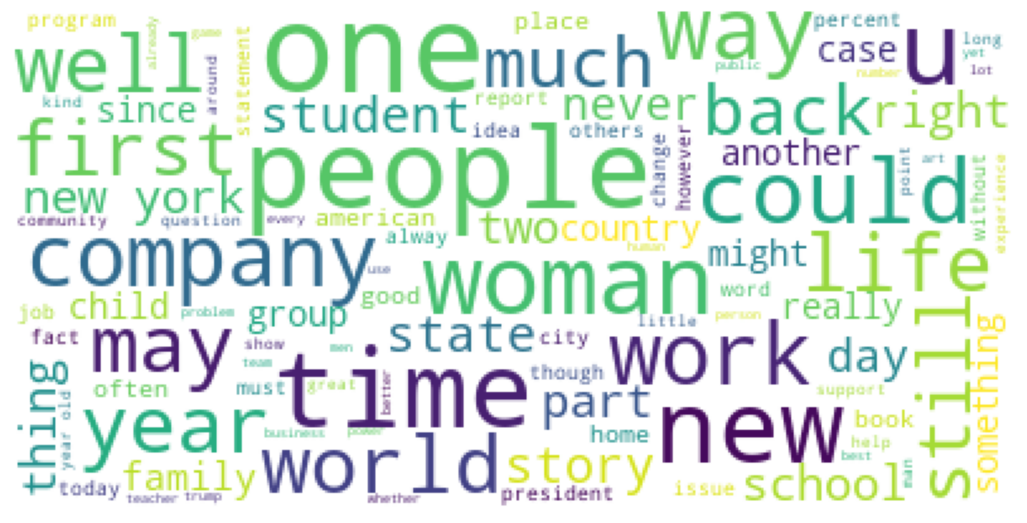

In [94]:
# Generate word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig(file_prefix + "wordcloud.png", dpi=900)

In [95]:
# Tokenize the text and build a vocabulary of known words
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [96]:
# Sample the returned vector encoding the length of the entire vocabulary
list(cv.vocabulary_.keys())[:10]

['october',
 'carolyn',
 'phone',
 'former',
 'agent',
 'model',
 'represent',
 'famous',
 'french',
 'photographer']

<h1> N-grams

In [97]:
# View most frequently occuring keywords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse=True)
    
    return words_freq[:n]


In [98]:
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns = ["Keyword", "Frequency"]
print(top_df)

    Keyword  Frequency
0       one      11942
1      year      11116
2    people      10208
3      time       9931
4     woman       8966
5       new       8913
6    school       7675
7     state       5585
8       way       5477
9     first       5387
10    world       4962
11     life       4921
12      day       4918
13      two       4706
14  company       4703
15    could       4702
16  student       4695
17     work       4694
18    right       4254
19    thing       4242


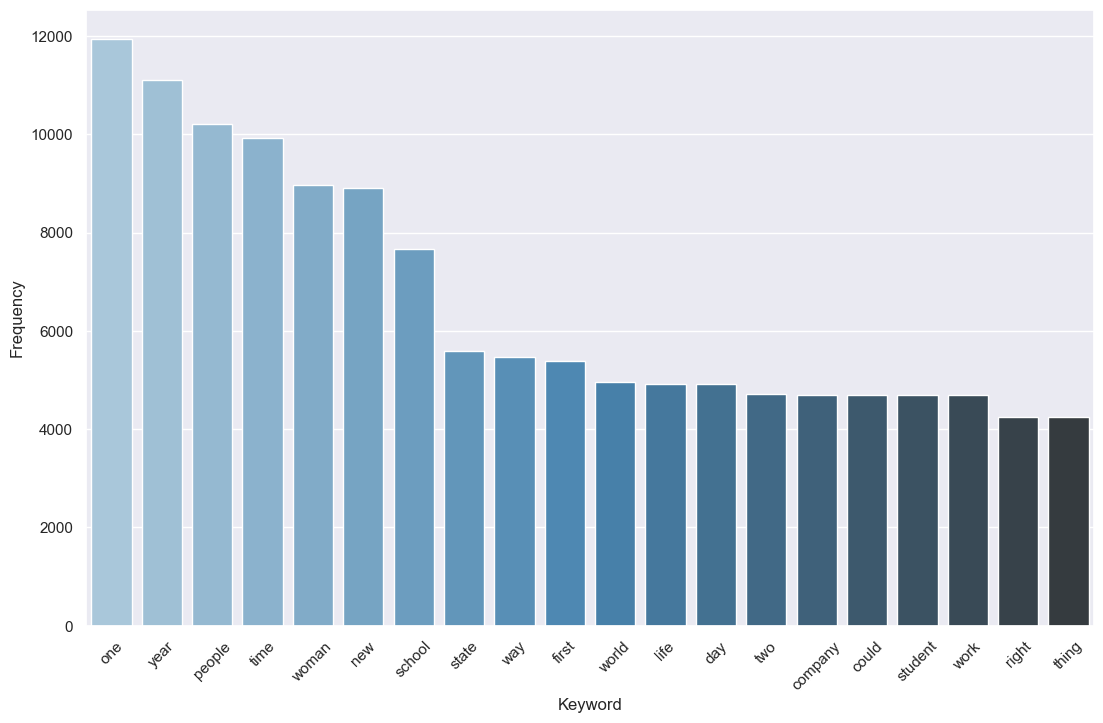

In [99]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.figure.savefig(file_prefix + "_keyword.png", bbox_inches = "tight")

In [100]:
# View most frequently occuring bigrams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse=True)
    
    return words_freq[:n]

              Bi-gram  Frequency
0            new york       2599
1            year old       1503
2         pic twitter       1157
3           last year       1139
4         high school        961
5         white house        877
6       social medium        796
7        united state        787
8           last week        769
9        donald trump        692
10           year ago        692
11   president donald        691
12  sexual harassment        672
13          york time        648
14     sexual assault        612
15      public school        587
16         last month        524
17            http co        491
18          york city        488
19     climate change        469


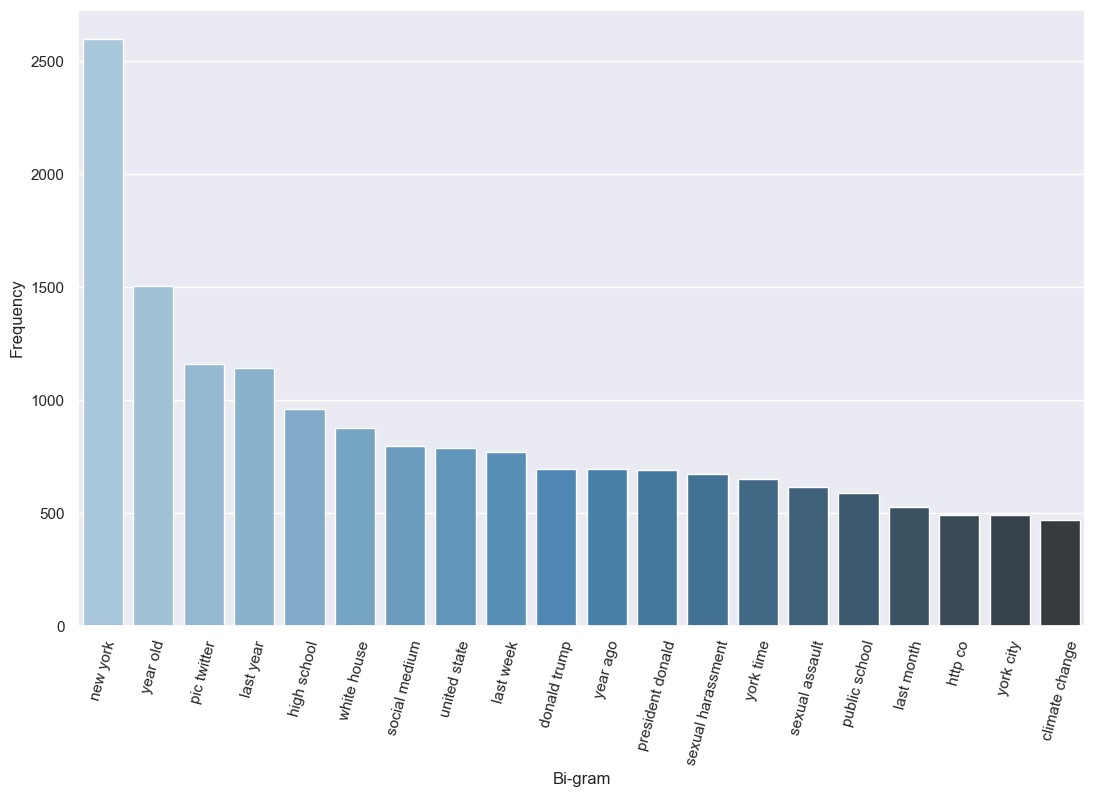

In [101]:
# Convert most freq bigrams to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
print(top2_df)
top2_df.to_csv(file_prefix + '_bigrams.csv')

# Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Frequency", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=75)
h.figure.savefig(file_prefix + "_bi-gram.png", bbox_inches = "tight")

In [102]:
# View most frequently occuring tri-grams
def get_top_n3_words(corpus, n=None):
    vec2 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec2.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec2.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse=True)
    
    return words_freq[:n]

                       Tri-gram  Frequency
0                 new york time        648
1                 new york city        488
2        president donald trump        314
3        president barack obama        122
4     sexual harassment assault        106
5           high school student         91
6           wall street journal         90
7   correction previous version         89
8                  world war ii         88
9      huffpost request comment         80
10       special counsel robert         78
11  immediately request comment         77
12    michigan state university         77
13       counsel robert mueller         76
14             los angeles time         74
15       previous version story         74
16          affordable care act         69
17            black life matter         68
18      respond request comment         68
19               new york state         66


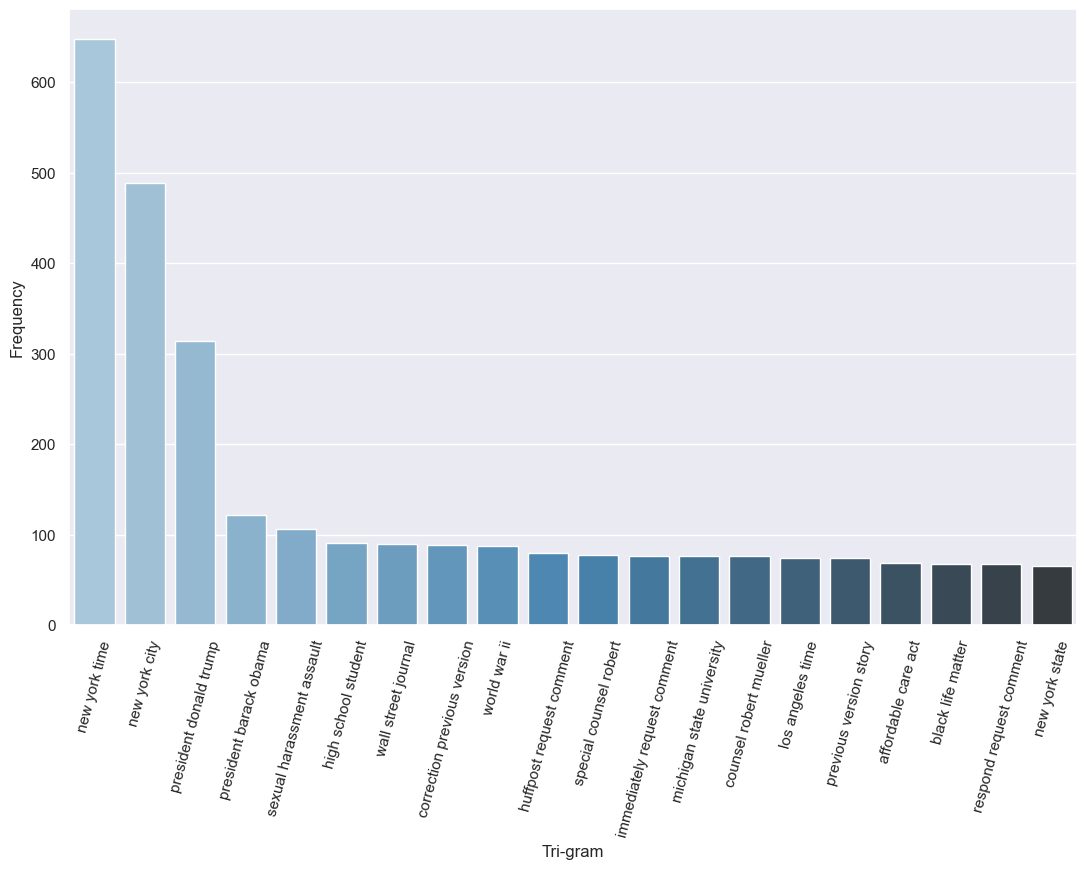

In [103]:
# Convert most freq trigrams to dataframe for plotting bar plot, save as CSV
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Frequency"]
print(top3_df)
top3_df.to_csv(file_prefix + '_trigrams.csv')

# Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Frequency", data=top3_df, palette="Blues_d")
j.set_xticklabels(j.get_xticklabels(), rotation=75)
j.figure.savefig(file_prefix + "_tri-gram.png", bbox_inches = "tight")

<h1> TF-IDF

In [104]:
# Get TF-IDF (term frequency/inverse document frequency) -- 
from sklearn.feature_extraction.text import TfidfTransformer 

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

# Get feature names
feature_names=cv.get_feature_names()
 
# Fetch document for which keywords needs to be extracted
doc=corpus[ds_count-1]
 
# Generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

c:\Users\julie\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [105]:
# Sort tf_idf in descending order
from scipy.sparse import coo_matrix

def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse= True)

def extract_topn_from_vector(feature_names, sorted_items, topn=25):
    
    # Use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # Word index and corresponding tf-idf score
    for idx, score in sorted_items:
        # Keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    # Create tuples of feature,score
    # Results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    return results

# Sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

# Extract only the top n; n here is 25
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# Print the results, save as CSV
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
name jamie online date aholic better part last eight year variety site sometimes one two three time within last year game every week new site try eagerly sign fad diet every type site every type dater one friend friend others date group others still nothing religious preference fun silly rapidly control five site day log onto computer phone direct line datesville hop tinder match without twice sleep hop back another swipe hunger noontime hinge match junkie fix okcupid match click app fast enough see often simultaneously legitimately interested others really pas time every conversation end date often nowhere talk week without either u initiating hangout virtual pen pal one another time random text odd hour fine first silly nonchalance everyone dabble fed two month ago new job transition load responsibility longer hour greater strain brain psyche previously formerly social life backseat toll sleep function full capacity weeknight date consume multiple slightly hungover day lon

<h1> TF-IDF Performance

In [106]:
text1 = "DUBLIN — Lawmakers elected Leo Varadkar as Ireland’s prime minister for a second time Saturday in agreed succession to Micheál Martin as the government partners vowed to defend the center ground of Irish politics against the nationalists of Sinn Féin. “The distinguishing feature of centrist democrats is the ability to respect differences, find points of agreement, and cooperate. This is what we have done,” Martin said as he backed Varadkar’s nomination as Taoiseach, a core commitment in their coalition pact struck in 2020. Under terms of that agreement, the nearly century-old rivals of Irish politics — Martin’s Fianna Fáil and Varadkar’s Fine Gael – formed their first joint government with support from a junior coalition partner, the Green Party. All three agreed that Martin would lead for the first 2 ½ years, Varadkar for the rest of an expected five-year administration."

In [107]:
text2 = "When two major political parties came together after Ireland's election in 2020, they agreed to share the role of taoiseach, or prime minister. After two-and-a-half years, Micheal Martin steps down and Varadkar returns.Leo Varadkar returned as taoiseach, or prime minister, of Ireland on Saturday, replacing Micheal Martin as part of an unconventional coalition deal struck more than two years ago. Varadkar's nomination was approved by lawmakers during a special session of the Dail, the lower house of parliament. Varadkar later received the seal of office from President Michael D. Higgins."

In [108]:
text3 = "Actor Kevin Spacey is to be charged with seven further sex offences in the UK, in addition to those he is already due to stand trial for in June next year.All the charges relate to one man. Britain's Crown Prosecution said that charges against the former House of Cards star are three of indecent assault, three of sexual assault and one of causing a person to engage in sexual activity without consent. The charges relate to incidents between 2001 and 2004. "

In [109]:
text4 = "In October, Kevin Spacey testified in a New York court where he faced a civil trial related to sexual-assault allegations levied against him by the actor Anthony Rapp. In 2017, Rapp alleged that Spacey — who was starring in Netflix’s House of Cards at the time — had sexually assaulted him when he was 14. Since then, over 30 men have come forward with accusations ranging from nonconsensual groping to the attempted rape of minors. Spacey, 62, initially responded to Rapp’s allegations with a muddled apology note in which he came out as gay (a deflection many criticized as conflating homosexuality and pedophilia) and claimed not to remember the incident, writing on Twitter, “If I did behave then as he describes, I owe him the sincerest apology for what would have been deeply inappropriate drunken behavior, and I am sorry for the feelings he describes having carried with him all these years.” Following the initial wave of allegations, Spacey was dropped by his talent agency and publicist, fired from House of Cards, and scrubbed from film projects. He retreated from public life, with a representative telling Variety he was seeking “evaluation and treatment,” though he has occasionally resurfaced over the years to launch film comebacks and post bizarre defenses on YouTube and Twitter."

In [110]:
# Fetch document for which keywords needs to be extracted
doc=text4
 
# Generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

# Sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

# Extract only the top n; n here is 25
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# Print the results, save as CSV
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
In October, Kevin Spacey testified in a New York court where he faced a civil trial related to sexual-assault allegations levied against him by the actor Anthony Rapp. In 2017, Rapp alleged that Spacey — who was starring in Netflix’s House of Cards at the time — had sexually assaulted him when he was 14. Since then, over 30 men have come forward with accusations ranging from nonconsensual groping to the attempted rape of minors. Spacey, 62, initially responded to Rapp’s allegations with a muddled apology note in which he came out as gay (a deflection many criticized as conflating homosexuality and pedophilia) and claimed not to remember the incident, writing on Twitter, “If I did behave then as he describes, I owe him the sincerest apology for what would have been deeply inappropriate drunken behavior, and I am sorry for the feelings he describes having carried with him all these years.” Following the initial wave of allegations, Spacey was dropped by his talent agency and p

In [115]:
text_list = [text1, text2, text3, text4]

In [118]:
# Pre-process dataset to get a cleaned and normalised text corpus
clean_text_list = []

for doc in text_list:
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(doc))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 

    # Removing verbs
    list_of_verbs = []
    pos_tagged_tokens = nltk.pos_tag(text)

    for i in range(len(pos_tagged_tokens)):
        if pos_tagged_tokens[i][1].startswith('V'):
            list_of_verbs.append(pos_tagged_tokens[i][0])

    text = [word for word in text if not word in list_of_verbs]

    text = " ".join(text)
    clean_text_list.append(text)

In [119]:
clean_text_list[1]

'two major political party together ireland election share role taoiseach prime minister two half year micheal martin step varadkar leo varadkar taoiseach prime minister ireland saturday micheal martin part unconventional coalition deal two year ago varadkar nomination lawmaker special session dail lower house parliament varadkar later seal office president michael higgins'

In [124]:
# Fetch document for which keywords needs to be extracted
doc = clean_text_list[3]
 
# Generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

# Sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

# Extract only the top n; n here is 25
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# Print the results, save as CSV
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
october spacey testified new york court civil trial sexual assault allegation actor anthony rapp rapp spacey netflix house card time sexually since men forward accusation nonconsensual groping rape minor spacey initially rapp allegation apology note gay deflection homosexuality pedophilia incident twitter sincerest apology deeply behavior sorry year initial wave allegation spacey talent agency publicist house card film project public life representative variety evaluation treatment though occasionally year launch film comeback post bizarre defense youtube twitter

Keywords:
spacey 0.583
allegation 0.251
apology 0.216
card 0.197
film 0.158
